In [52]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

[*********************100%%**********************]  1 of 1 completed


C:\Users\natha\AppData\Local\Temp\ipykernel_3020\401297149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'Dates', 'Close': 'Prices'}, inplace=True)


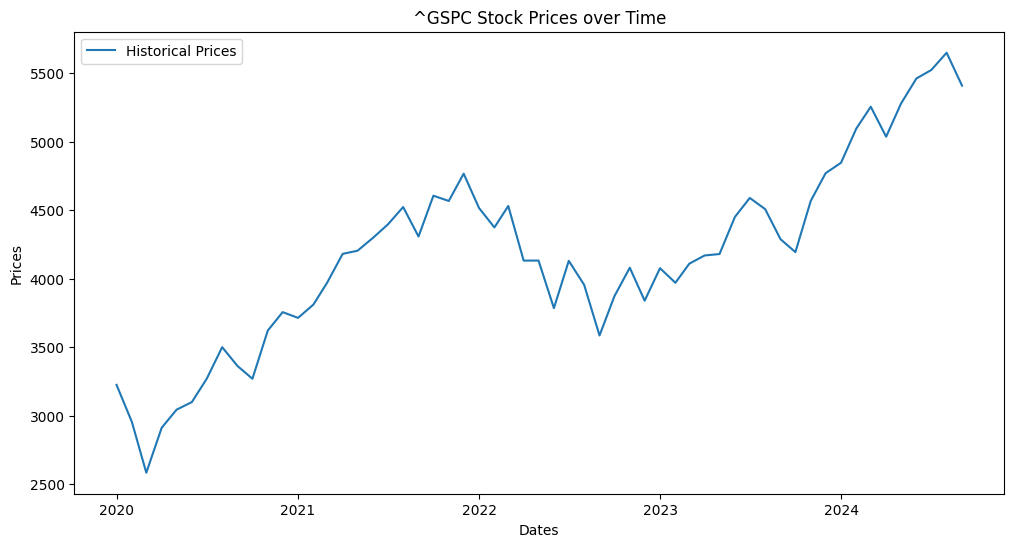

In [53]:
# Load the data using yfinance
def fetch_data(ticker, start_date):
    end_date = pd.Timestamp.now().strftime('%Y-%m-%d')  # Use current date as end date
    data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')  # Monthly data
    data = data[['Close']]
    data.reset_index(inplace=True)
    data.rename(columns={'Date': 'Dates', 'Close': 'Prices'}, inplace=True)
    data.set_index('Dates', inplace=True)
    return data

# Fetch stock data from Yahoo Finance
ticker = '^GSPC'  # Example ticker symbol, you can replace it with any valid ticker
start_date = '2020-01-01'
df = fetch_data(ticker, start_date)

# Visualize the data to identify patterns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], label='Historical Prices')
plt.title(f'{ticker} Stock Prices over Time')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [54]:
# Function to forecast prices until a specific future date
def forecast_until_date(future_date, df):
    model = ExponentialSmoothing(df['Prices'], trend='add', seasonal='add', seasonal_periods=12)
    fitted_model = model.fit()

    # Calculate the number of months between the last historical date and the future date
    forecast_periods = (pd.to_datetime(future_date).year - df.index[-1].year) * 12 + (pd.to_datetime(future_date).month - df.index[-1].month)
    
    forecast_index = pd.date_range(df.index[-1], periods=forecast_periods + 1, freq='ME')[1:]
    forecast = fitted_model.forecast(steps=forecast_periods)
    
    return forecast_index, forecast

# Function to estimate price for any specific date
def estimate_price(date, df):
    date = pd.to_datetime(date)
    forecast_index, forecast = forecast_until_date(date, df)
    if date in forecast_index:
        return forecast[forecast_index.get_loc(date)]
    else:
        raise ValueError("Date too far in the future for current extrapolation")

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\natha\AppData\Local\Temp\ipykernel_3020\2103290671.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return forecast[forecast_index.get_loc(date)]
C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Estimated ^GSPC stock price for 2025-12-31: 6556.18


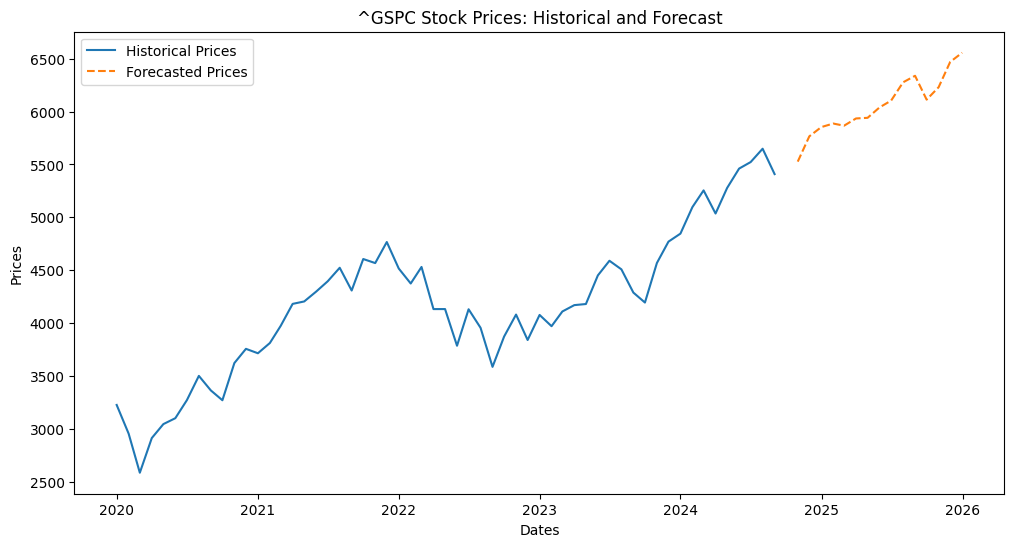

In [55]:
# Example usage
date_input = '2025-12-31'
price_estimate = estimate_price(date_input, df)
print(f"Estimated {ticker} stock price for {date_input}: {price_estimate:.2f}")

# Plot historical prices and the forecasted future prices
if pd.to_datetime(date_input) > df.index[-1]:
    forecast_index, forecast = forecast_until_date(date_input, df)
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Prices'], label='Historical Prices')
    plt.plot(forecast_index, forecast, label='Forecasted Prices', linestyle='--')
    plt.title(f'{ticker} Stock Prices: Historical and Forecast')
    plt.xlabel('Dates')
    plt.ylabel('Prices')
    plt.legend()
    plt.show()